In [1]:
from parametricGarch import Garch
import yfinance as yf
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Download S&P 500 stock data
stocks_data = yf.download('^GSPC', start='2012-01-01', end='2022-12-31')

#extract close prices
stocks_data = stocks_data['Close']

# Calculate the returns and drop empty rows
returns = stocks_data.pct_change().dropna() * 100

# Print the returns
print(returns.head())

[*********************100%***********************]  1 of 1 completed
Date
2012-01-04    0.018792
2012-01-05    0.294372
2012-01-06   -0.253696
2012-01-09    0.226160
2012-01-10    0.888577
Name: Close, dtype: float64


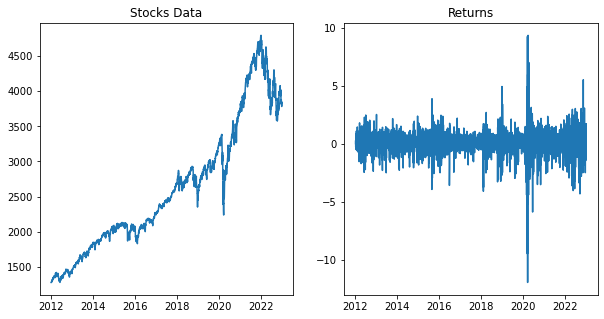

In [3]:
# Plot of the stocks data and the returns
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].plot(stocks_data)
axs[0].set_title('Stocks Data')

axs[1].plot(returns)
axs[1].set_title('Returns')

plt.show()

In [4]:
# Call Garch function
garch_model = Garch(returns) # using default paramters
garch_model

In [5]:
# Model Summary
garch_model.summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -3443.55
Distribution:                  Normal   AIC:                           6895.11
Method:            Maximum Likelihood   BIC:                           6918.81
                                        No. Observations:                 2767
Date:                Tue, Jul 11 2023   Df Residuals:                     2766
Time:                        10:01:47   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0830  1.367e-02      6.072  1.262e-09 [5.620e-02,  0.110]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0412  9.050e-03      4.553  5.283e-06 [2.347e-02,5.894e-02]
alpha[1]       0.2005  2.915e-02      6.878  6.056e-12     [  0.143,  0.258]
beta[1]        0.7659  2.736e-02     27.994 1.926e-172     [  0.712,  0.820]
============================================================================

Covariance estimator: robust
"""

In [6]:
# Obtain the conditional volatility
garch_model.conditional_volatility

Date
2012-01-04    0.544674
2012-01-05    0.518896
2012-01-06    0.506347
2012-01-09    0.510196
2012-01-10    0.494653
                ...   
2022-12-23    1.286136
2022-12-27    1.165769
2022-12-28    1.062929
2022-12-29    1.112476
2022-12-30    1.242430
Name: cond_vol, Length: 2767, dtype: float64

<AxesSubplot:xlabel='Date'>

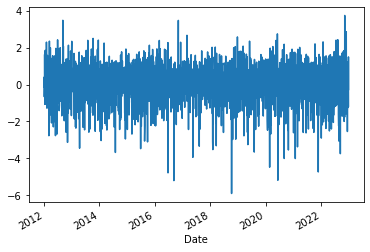

In [7]:
# Checking if the standardised residuals resemble a white noise process
std_resid = garch_model.standardised_residuals
std_resid.plot()

In [8]:
# Obtain the forecasted mean
garch_model.forecast_mean

,h.1
Date,
2022-12-30,0.082985


In [9]:
# Obtain the forecasted conditional variance
garch_model.forecast_variance

,h.1
Date,
2022-12-30,1.24626


In [10]:
# Obtain the forecasted conditional variance of the residuals
garch_model.forecast_residual_variance

,h.1
Date,
2022-12-30,1.24626


In [11]:
# Parametric Bootstrapping Procedure
garch_model.bootstrap(1000)

True

In [12]:
# Summary of the bootstrapped model
garch_model.bootstrap_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:              std_resid   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -3942.90
Distribution:                  Normal   AIC:                           7893.80
Method:            Maximum Likelihood   BIC:                           7917.50
                                        No. Observations:                 2767
Date:                Tue, Jul 11 2023   Df Residuals:                     2766
Time:                        10:02:28   Df Model:                            1
                                  Mean Model                                  
==============================================================================
                 coef    std err          t      P>|t|        95.0% Conf. Int.
------------------------------------------------------------------------------
mu            -0.0507  1.918e-02     -2.644  8.200e-03 [-8.832e-02,-1.312e-02]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      4.3494e-03  2.611e-03      1.666  9.570e-02 [-7.673e-04,9.466e-03]
alpha[1]   4.9179e-04  2.130e-03      0.231      0.817 [-3.682e-03,4.666e-03]
beta[1]        0.9954  3.878e-03    256.698      0.000      [  0.988,  1.003]
=============================================================================

Covariance estimator: robust
"""

In [ ]:
# List of forecasted mean and volatility of the bootstrapped sample
garch_model.bootstrap_samples

In [13]:
garch_model.estimate_risk(confidence_level=0.95, q='empirical')

{'Mean Volatility': 0.9984501164403532,
 'Volatility Confidence Interval': array([0.95519741, 1.05132102]),
 'Mean VaR': -1.8134474000856617,
 'VaR Confidence Interval': array([-1.92653535, -1.71521832])}